# **Excercise: Search algorithm**

<div align="justify">

We have a directed graph that represents a communication network
between servers. Each node represents a server, and each edge
represents a connection with an associated cost (transmission time
in milliseconds). The objective is to find the optimal route from a
start server to a destination server using search algorithms

</div>

## **Uninformed graphs**

There is just one uniformed algorithm that reach the optimal route and uses a graph with cost:

*   Uniform Cost Search (UCS)

In [15]:
import heapq # Priority queue
from collections import deque # Import queue

# For plotting the graph
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
# Maze with cost in a dictionary form
maze_with_cost = {
  'A': [('B', 10), ('C', 15)],
  'B': [('D', 12)],
  'C': [('D', 10)],
  'D': [('E', 5)],
}

### **Uniform cost search algorithm**

In [17]:
# Uniform cost search algorithm
def UCS(graph, start, end):
  # Priority queue stores tuples of (cost, node, path)
  priority_queue = [(0, start, [])]
  visited = set()  # Set to keep track of visited nodes

  while priority_queue:
      # Extract the node with the lowest cost from the priority queue
      cost, node, path = heapq.heappop(priority_queue)

      if node in visited: # If the node has already been visited, we skip it
          continue
      visited.add(node)  # Mark the node as visited

      # Update the path with the current node
      path = path + [node]

      # If we reached the end node, then return the result
      if node == end:
          # Prints a message
          print(f"The path would cost: {cost}. Shortest path is: {path}")
          return path

      # Retrieves all neighbors of node
      for neighbor, edge_cost in graph.get(node, []):
          if neighbor not in visited: # If the neighbor has not been visited, we add it to the priority queue

              # Push the neighbor into the priority queue with updated cost and path
              heapq.heappush(priority_queue, (cost + edge_cost, neighbor, path))

  return "No path found"

In [18]:
shortest_path_graph = UCS(maze_with_cost, 'A', 'E')

The path would cost: 27. Shortest path is: ['A', 'B', 'D', 'E']


## **Informed algorithms**

There are just two uniformed algorithms that reach the optimal route, use a graph with cost and heruistics:

*   A*
*   A* Tree Search

In [19]:
# Heruistics
heuristic_values = {
    'A': 20,
    'B': 15,
    'C': 10,
    'D': 5,
    'E': 0,
}

### **A*** **algorithm**

In [20]:
def a_star_search(graph, start, goal, heuristic_values):

  open_list = [] # Create a list that stores tuples
  initial_heuristic = heuristic_values.get(start, float('inf'))
  heapq.heappush(open_list, (initial_heuristic, 0, start, [start]))

  # The closed_set keeps track of nodes that have been completely visited
  closed_set = set()

  while open_list:
      # Pop the node with the smallest total estimated cost from the priority queue
      total_estimated_cost, path_cost, current_node, path_so_far = heapq.heappop(open_list)

      # Check if we have reached the goal node
      if current_node == goal:
          return f"Path found: {path_so_far}. Total cost: {path_cost}"

      # If the node was already visited we skip it
      if current_node in closed_set:
          continue
      closed_set.add(current_node)

      # Expand the current node's neighbors
      for neighbor, edge_cost in graph.get(current_node, []):
          # Skip neighbor if it has already been processed
          if neighbor in closed_set:
              continue

          new_path_cost = path_cost + edge_cost # Compute new cost from start to neighbor
          heuristic_neighbor = heuristic_values.get(neighbor, float('inf')) # Retrieve the heuristic value for the neighbor

          # Compute the total estimated cost for the neighbor
          new_total_estimated_cost = new_path_cost + heuristic_neighbor

          new_path = path_so_far + [neighbor] # Construct the new path

          # Push the neighbor into the priority queue
          heapq.heappush(open_list, (new_total_estimated_cost, new_path_cost, neighbor, new_path))

  return "No path found"

In [21]:
a_star_search(maze_with_cost, 'A', 'E', heuristic_values)

"Path found: ['A', 'B', 'D', 'E']. Total cost: 27"

### **A** **tree algorithm***

In [22]:
def a_tree_search(graph, start, goal, heuristic_values):
  # Start with the starting node
  initial_h = heuristic_values.get(start, float('inf'))  # Use the heuristic value for the start node
  open_list = [(initial_h, 0, start, [start])]

  # Create set
  closed_set = set()

  while open_list:
      # Pop the node with the smallest value
      total_cost, cost_so_far, current, path = heapq.heappop(open_list)

      # If the current node is the goal, return the path and total cost
      if current == goal:
          return f"Path found: {path}. Total cost: {cost_so_far}" # Print path


      # If the node has already been visited the skip it
      if current in closed_set:
          continue
      closed_set.add(current)

      # Expand neighbors of the current node
      for neighbor, edge_cost in graph.get(current, []):
          if neighbor in closed_set:
              continue  # Skip already processed neighbors

          new_cost = cost_so_far + edge_cost  # Update cumulative cost g

          # Get the heuristic value for the neighbor (use infinity if missing)
          new_h = heuristic_values.get(neighbor, float('inf'))
          new_total_cost = new_cost + new_h # formula: f = g + h
          new_path = path + [neighbor] # Extend the current path

          # Push the neighbor into the priority queue
          heapq.heappush(open_list, (new_total_cost, new_cost, neighbor, new_path))

  return "No path found"

In [23]:
a_tree_search(maze_with_cost, 'A', 'E', heuristic_values)

"Path found: ['A', 'B', 'D', 'E']. Total cost: 27"

## **Printing the graph**

In [24]:
def plot_weighted_graph(graph_dict, path):
    G = nx.Graph() # Create a graph

    for node, neighbors in graph_dict.items(): # Add nodes and edges from the dictionary to the graph
        for neighbor, weight in neighbors:
            G.add_edge(node, neighbor, weight=weight)

    # Plot the whole graph
    plt.figure(figsize=(6, 6))
    plt.title("Graph obtained from dictionary")

    pos = nx.spring_layout(G)  # Layout type
    labels = nx.get_edge_attributes(G, 'weight')  # Get the weights of every edge
    nx.draw(G, pos=pos, with_labels=True, node_size=2000, font_size=10, font_weight="bold")
    nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)

    # Plot the path

    path_edges = [] # Empty list to store the edges

    # Loop through the path and extract each pair of consecutive nodes
    for i in range(len(path) - 1):
        # Append each pair of consecutive nodes
        path_edges.append((path[i], path[i + 1]))# Extract edges that are part of the path

    # Draw the path edges in a different color (highlight)
    nx.draw_networkx_edges(G, pos=pos, edgelist=path_edges, edge_color="red", width=3)

    plt.tight_layout() # Have a nice layout
    plt.show()

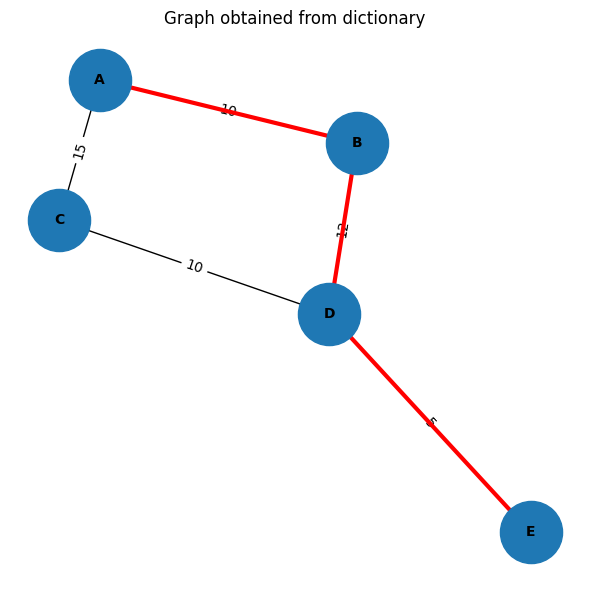

In [25]:
# Calling function to make the graph from the dictionary representation
plot_weighted_graph(maze_with_cost, shortest_path_graph)